# 5주차 과제 : 크롤링 및 워드클라우드

In [45]:
!pip install konlpy

In [46]:
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

import requests
import pandas as pd
from bs4 import BeautifulSoup

4월 1일자 네이버 뉴스 기사 제목

In [47]:
#특정한 날짜의 네이버 뉴스 랭킹 기사 제목 추출
date='20220401' 
news_title_url ='https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date) 
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req_news = requests.get(news_title_url, headers = headers)
soup = BeautifulSoup(req_news.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

In [48]:
#기사 제목을 리스트에 저장하기
multi_title = []
for i in range(len(news_titles)):
    multi_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) 

1 "설악산 흔들바위 추락했다" 21년째 속고 또 속는 이유
2 서희원 전 남편 "내 새끼들, 구준엽을 아빠라 안 불렀으면"
3 쇄골 드러난 손예진 시스루 드레스…빌게이츠 딸도 입었다
4 이래서 손예진 부케 받았나…공효진, 10살 연하 케빈오와 열애
5 "마스크 벗어라, TV랑 틀려" 민주당男의원 말에 박지현 반응
6 “1년째 미열, 두통”…코로나 ‘긴 후유증’에 무너진 삶
7 유영하 “대구시장 출마”…박근혜 영향력 얼마나 될까
8 “주변에 물 타실 분…” 도이치 주가 방어 부탁하자 김건희 계좌 이용
9 장제원·김은혜 몸담은 MB 정부도 ‘여성부 축소’ 2년 만에 원상복구
10 코로나 후유증 앓는 이들을 위한 안내서…숨차거나 흉통 땐 검사를
11 5개 차로 한 번에 바꾼 택시…피하려던 차량 탑승자 사망
12 싸이월드 모바일앱…그때 번호 없는데 본인인증 어떻게?
13 “2주간 확연한 감소세면 ‘실내마스크’ 제외 모든 거리두기 해제 검토”
14 전쟁 통에 파종 나선 우크라 농민들 “세계 식량 지킨다”
15 ‘앞머리는 눈썹 위’…40년 전 ‘두발 규제’ 여전
16 “강남 25평 아파트 건설원가 1.5억원…원가공개 확산해야"
17 "하룻밤 사이 정상 올랐다"…1위 암호화폐 거래소 CEO, 변치 않는 '초심'
18 한반도를 덮친 푸틴의 전쟁…무너진 황금아치 [쓰리고]
19 폭행사건 말문 연 코미디언…"시상식 퇴장도 거부"
20 미우미우는 왜 윤아에게 '로우라이즈'를 입혔나 [이지효의 아이 '돈' 노우]
21 "다주택자 양도세 중과 면제로 급매물 나온다…비강남에서"
22 [단독]尹측 "임기 말 해외 출장 장관, 감사원에 감사 요청"…본격 군기잡기
23 [속보]경남 사천서 공군 KT-1 훈련기 2대 충돌 추락…3명 사망·1명 중상
24 민주당 '靑특활비' 논란에 "김건희 주가조작 규명하라" 맹공
25 "의사에게 타투 받고 싶지 않아요"…헌재 판단은 달랐다
26 '연회비 26만원' 카드 불티…어떤 파격혜택 제공하길래
27 손예진 웨딩드레스 화제...빌 게이츠 딸도 입은 '이

In [49]:
#문장연결하기
title = "".join(multi_title)
stop_title = title.replace('\n',' '.replace('.', ' ').replace(',',' ').replace('"',' ').replace("'"," ").replace('=',' '))
stop_title

'"설악산 흔들바위 추락했다" 21년째 속고 또 속는 이유서희원 전 남편 "내 새끼들, 구준엽을 아빠라 안 불렀으면"쇄골 드러난 손예진 시스루 드레스…빌게이츠 딸도 입었다이래서 손예진 부케 받았나…공효진, 10살 연하 케빈오와 열애"마스크 벗어라, TV랑 틀려" 민주당男의원 말에 박지현 반응“1년째 미열, 두통”…코로나 ‘긴 후유증’에 무너진 삶유영하 “대구시장 출마”…박근혜 영향력 얼마나 될까“주변에 물 타실 분…” 도이치 주가 방어 부탁하자 김건희 계좌 이용장제원·김은혜 몸담은 MB 정부도 ‘여성부 축소’ 2년 만에 원상복구코로나 후유증 앓는 이들을 위한 안내서…숨차거나 흉통 땐 검사를5개 차로 한 번에 바꾼 택시…피하려던 차량 탑승자 사망싸이월드 모바일앱…그때 번호 없는데 본인인증 어떻게?“2주간 확연한 감소세면 ‘실내마스크’ 제외 모든 거리두기 해제 검토”전쟁 통에 파종 나선 우크라 농민들 “세계 식량 지킨다”‘앞머리는 눈썹 위’…40년 전 ‘두발 규제’ 여전“강남 25평 아파트 건설원가 1.5억원…원가공개 확산해야""하룻밤 사이 정상 올랐다"…1위 암호화폐 거래소 CEO, 변치 않는 \'초심\'한반도를 덮친 푸틴의 전쟁…무너진 황금아치 [쓰리고]폭행사건 말문 연 코미디언…"시상식 퇴장도 거부"미우미우는 왜 윤아에게 \'로우라이즈\'를 입혔나 [이지효의 아이 \'돈\' 노우]"다주택자 양도세 중과 면제로 급매물 나온다…비강남에서"[단독]尹측 "임기 말 해외 출장 장관, 감사원에 감사 요청"…본격 군기잡기[속보]경남 사천서 공군 KT-1 훈련기 2대 충돌 추락…3명 사망·1명 중상민주당 \'靑특활비\' 논란에 "김건희 주가조작 규명하라" 맹공"의사에게 타투 받고 싶지 않아요"…헌재 판단은 달랐다\'연회비 26만원\' 카드 불티…어떤 파격혜택 제공하길래손예진 웨딩드레스 화제...빌 게이츠 딸도 입은 \'이 브랜드\'드디어 마스크 벗나…"2주 뒤 실내마스크 외 거리두기 해제 검토"얕본 우크라도 버거운데…복병 만난 러시아, 이들의 정체"보험사가 남편 사망금 안

In [50]:
#형태소 분석
tw = Twitter()
tokens_kor = tw.nouns(stop_title)
tokens_kor
kor = nltk.Text(tokens_kor)
kor.tokens
kor.vocab()
new_kor=[]
for word in kor:
  if len(word) > 1 and word != ' ':
        new_kor.append(word)
new_kor
kor = nltk.Text(new_kor)
kor.tokens
kor.vocab()
data = kor.vocab().most_common(200)
data = dict(data)

In [51]:
data

{'가스': 3,
 '가평': 10,
 '가품': 4,
 '갈등': 3,
 '감사': 3,
 '강남': 3,
 '거리': 14,
 '건강': 3,
 '검사': 9,
 '검토': 10,
 '경남': 5,
 '계곡': 10,
 '계속': 3,
 '계좌': 2,
 '공개': 3,
 '공군': 12,
 '공습': 4,
 '과거': 4,
 '구준엽': 2,
 '국민': 4,
 '규제': 4,
 '그룹': 3,
 '근무': 6,
 '금리': 3,
 '금지': 3,
 '기업': 3,
 '긴급': 3,
 '김건희': 6,
 '김어준': 5,
 '김은혜': 2,
 '김정숙': 24,
 '나선': 4,
 '남편': 10,
 '내부': 3,
 '노동자': 3,
 '논란': 21,
 '뉴스': 3,
 '다음': 4,
 '단골': 7,
 '단독': 16,
 '당선인': 5,
 '대구': 3,
 '대구시': 6,
 '대우조선': 3,
 '대통령': 13,
 '두기': 14,
 '드레스': 2,
 '디자이너': 8,
 '딸도': 3,
 '러시아': 8,
 '마스크': 19,
 '매각': 3,
 '면제': 3,
 '모든': 7,
 '모임': 5,
 '문제': 4,
 '민주당': 8,
 '박근혜': 6,
 '반대': 6,
 '반발': 4,
 '방역': 4,
 '백전': 3,
 '뱅크': 3,
 '병원': 4,
 '보건소': 3,
 '본사': 3,
 '본토': 3,
 '브랜드': 5,
 '비드': 3,
 '사과': 4,
 '사람': 3,
 '사망': 13,
 '사용': 4,
 '사장': 4,
 '사진': 4,
 '사천': 8,
 '살인': 10,
 '삼성': 6,
 '새끼': 2,
 '서울': 6,
 '서울시장': 3,
 '서희원': 2,
 '선택': 6,
 '세계': 2,
 '속보': 5,
 '손예진': 9,
 '송영길': 4,
 '순직': 5,
 '시간': 4,
 '시대': 3,
 '시장': 3,
 '식당': 5,
 '실내': 11,
 '실외': 3,
 '실종': 3,
 '쌍방울': 5,

In [53]:
#한글 다운로드 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


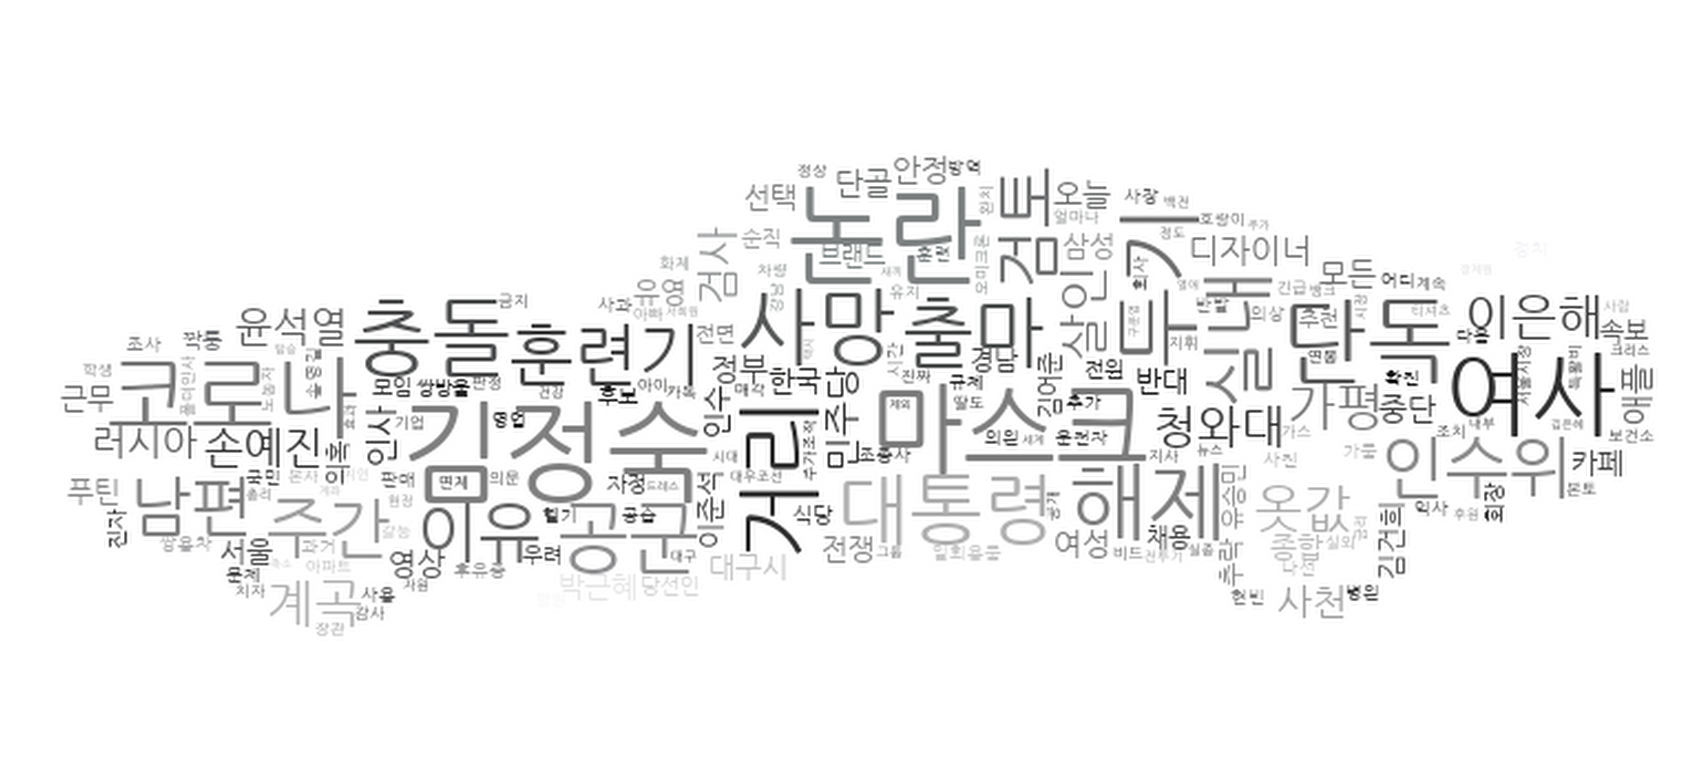

In [54]:
#차
stopwords = set(STOPWORDS)    
stopwords.update(["단독", "모든", "속보", "추천", "오늘", "화제"])
img_mask = np.array(Image.open("car.jpg")) 
image_colors = ImageColorGenerator(img_mask)  
FONTPATH =  "NanumGothic.ttf"


wordcloud=WordCloud(max_font_size=50, max_words=1000, background_color="white",random_state=10,stopwords=stopwords, mask=img_mask, color_func=image_colors, font_path=FONTPATH)
wc = wordcloud.generate_from_frequencies(data)

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

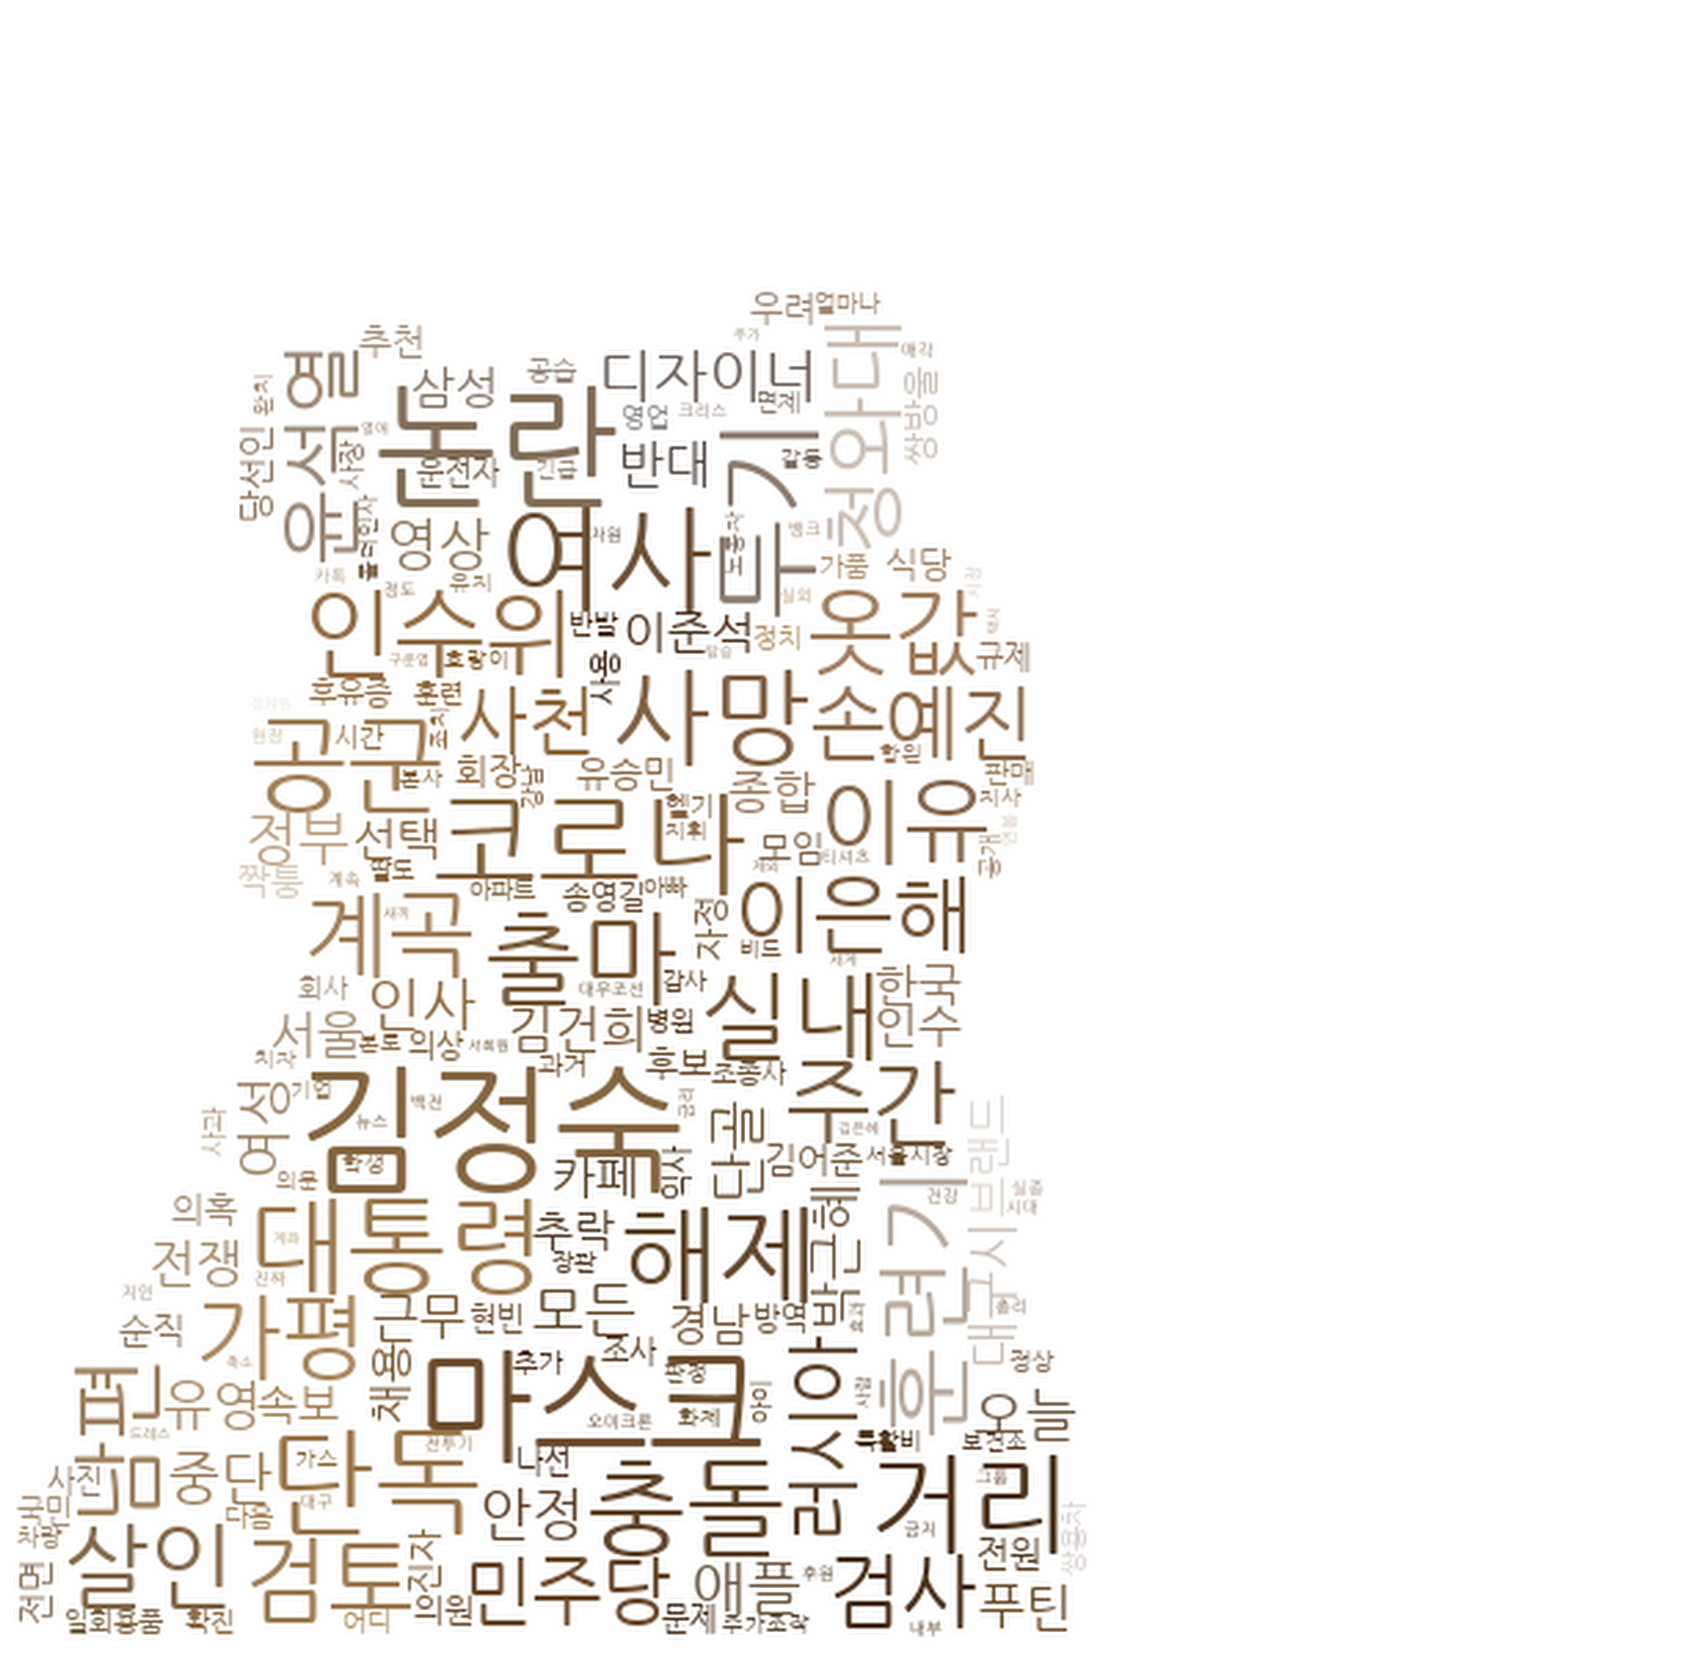

In [55]:
#쿼카
stopwords = set(STOPWORDS)    
stopwords.update(["단독", "모든", "속보", "추천", "오늘", "화제"])
img_mask = np.array(Image.open("쿼카.jpg")) 
image_colors = ImageColorGenerator(img_mask)  
FONTPATH =  "NanumGothic.ttf"


wordcloud=WordCloud(max_font_size=50, max_words=1000, background_color="white",random_state=10,stopwords=stopwords, mask=img_mask, color_func=image_colors, font_path=FONTPATH)
wc = wordcloud.generate_from_frequencies(data)

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

웹툰 크롤링

In [11]:
#URL
#https://comic.naver.com/webtoon/list?titleId=790713&weekday=tue

In [12]:
!pip install selenium

In [13]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver

In [14]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graph

In [15]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') 
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [16]:
driver.get("https://comic.naver.com/webtoon/list?titleId=790713&weekday=tue")

In [17]:
data = pd.DataFrame(data=[], columns=['회차','날짜','이름','아이디','댓글'])

In [18]:
def collector(driver, data, k):
    driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    #수집하고자 하는 웹툰 회차의 마지막 페이지 URL을 입력
    #https://comic.naver.com/webtoon/detail?titleId=790713&no=10&weekday=tue
    url = 'https://comic.naver.com/webtoon/detail?titleId=790713&no='+str(k)

# 1-9회까지 모든 댓글 수집 


    driver.get(url)
    time.sleep(2)
    
    #해당 프레임으로 이동
    driver.switch_to.frame('commentIframe') 
    
    num = k
    names = driver.find_elements_by_css_selector('.u_cbox_nick')
    dates = driver.find_elements_by_css_selector('.u_cbox_date')
    user_ids = driver.find_elements_by_css_selector('.u_cbox_id')
    reviews = driver.find_elements_by_css_selector('.u_cbox_contents')

    for i in range(len(names)):
        temp = []
        
        #요소를 추가하는 코드
        temp.append(num)
        temp.append(dates[i].text)
        temp.append(names[i].text)
        temp.append(user_ids[i].text)
        temp.append(reviews[i].text)
        
        temp = pd.DataFrame(data=[temp], columns=data.columns)
        
        #여러 범위 또는 문자열의 텍스트를 결합
        data = pd.concat([data,temp])
        
    driver.close()
    print(str(num) + '화 베스트 댓글 수집 끝')
    
    return data

In [19]:
for k in range(1,10): 
  data = collector(driver, data, k)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


1화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


2화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


3화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


4화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


5화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


6화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


7화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


8화 베스트 댓글 수집 끝


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


9화 베스트 댓글 수집 끝


In [20]:
data

,회차,날짜,이름,아이디,댓글
0,1,2022-02-28 13:18,01년생 중장년,(hich****),진정한 병앓이다...
0,1,2022-02-28 13:07,haha,(subi****),헐 대박 ㅠㅠㅠ 정식연재 축하드립니다 ㅠㅠㅠ 이거 완전 재밌어요!!
0,1,2022-02-28 13:35,셋하고스물여덟,(kevi****),교수님이 오셨는데 아무도 깨워주지도 않는 연구실이라니
0,1,2022-02-28 13:02,김에피,(ella****),학부생에게는 대학원에 가지 않을 용기를석박사생에게는 대학원에서 탈출할 의지를주는 갓...
0,1,2022-02-28 13:05,YCDAT,(spee****),작가님 이거 장르 오류난거같은데..호러 아닌가요?
...,...,...,...,...,...
0,9,2022-03-10 18:09,모투,(motu****),새 컴퓨터가 필요하시다면 여러분이 돈을 버시면 됩니다^^ 어떻게 버냐고요? 공대 대...
0,9,2022-03-10 14:14,말포이,(door****),이 배신자
0,9,6일 전,위브,(tmdc****),'생활하는'
0,9,2022-03-10 13:56,싼쵸,(s752****),1. 교수님의 갑작스러운 방문 시 내 모니터를 가장 먼저 보심2. 선배들 지나다니면...


In [21]:
best_review = data['댓글']
print(best_review)
best_review.to_csv('대학원탈출일지.txt', index = False)

0                                          진정한 병앓이다...
0                헐 대박 ㅠㅠㅠ 정식연재 축하드립니다 ㅠㅠㅠ 이거 완전 재밌어요!!
0                        교수님이 오셨는데 아무도 깨워주지도 않는 연구실이라니
0    학부생에게는 대학원에 가지 않을 용기를석박사생에게는 대학원에서 탈출할 의지를주는 갓...
0                          작가님 이거 장르 오류난거같은데..호러 아닌가요?
                           ...                        
0    새 컴퓨터가 필요하시다면 여러분이 돈을 버시면 됩니다^^ 어떻게 버냐고요? 공대 대...
0                                                이 배신자
0                                               '생활하는'
0    1. 교수님의 갑작스러운 방문 시 내 모니터를 가장 먼저 보심2. 선배들 지나다니면...
0                                        단점이 두 갴ㅋㅋㅋㅋㅋㅋ
Name: 댓글, Length: 135, dtype: object


In [22]:
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
with open('대학원탈출일지.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1] 

In [24]:
! apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.


In [25]:
pip install matplotlib

In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [28]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

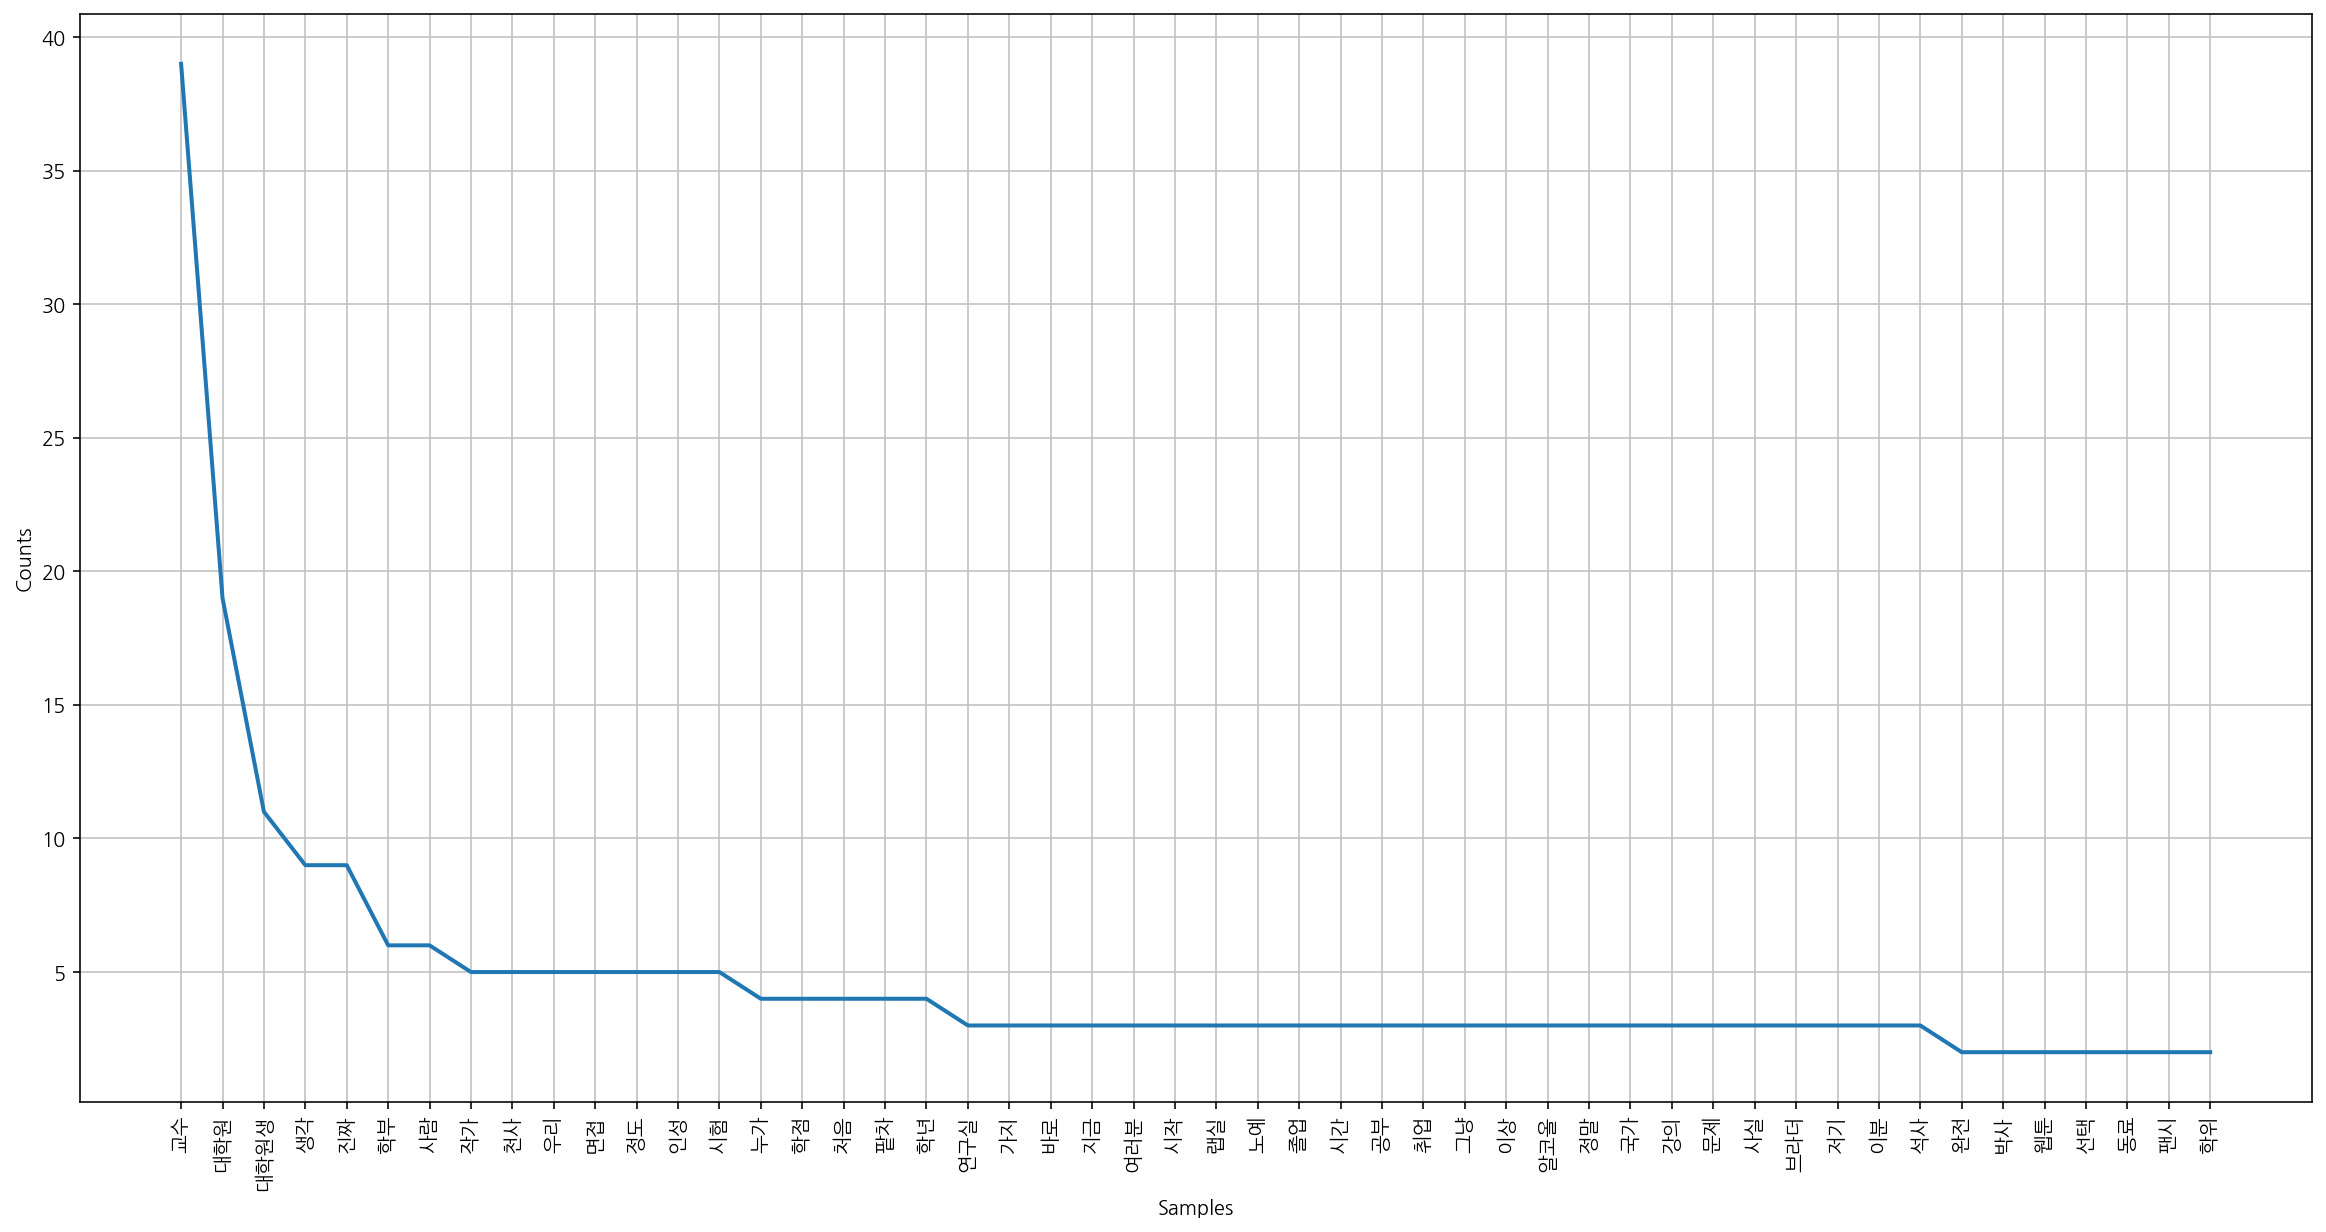

In [30]:
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import font_manager

%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 

#plt.figure(figsize=(12,6))
plt.figure(figsize=(20,10))
words = nltk.Text(words, name='단어 빈도수')
words.plot(50) # 50개만
plt.show()

In [38]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['진짜','지금', '그냥', '사실', '저기', '여러분', '정말']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

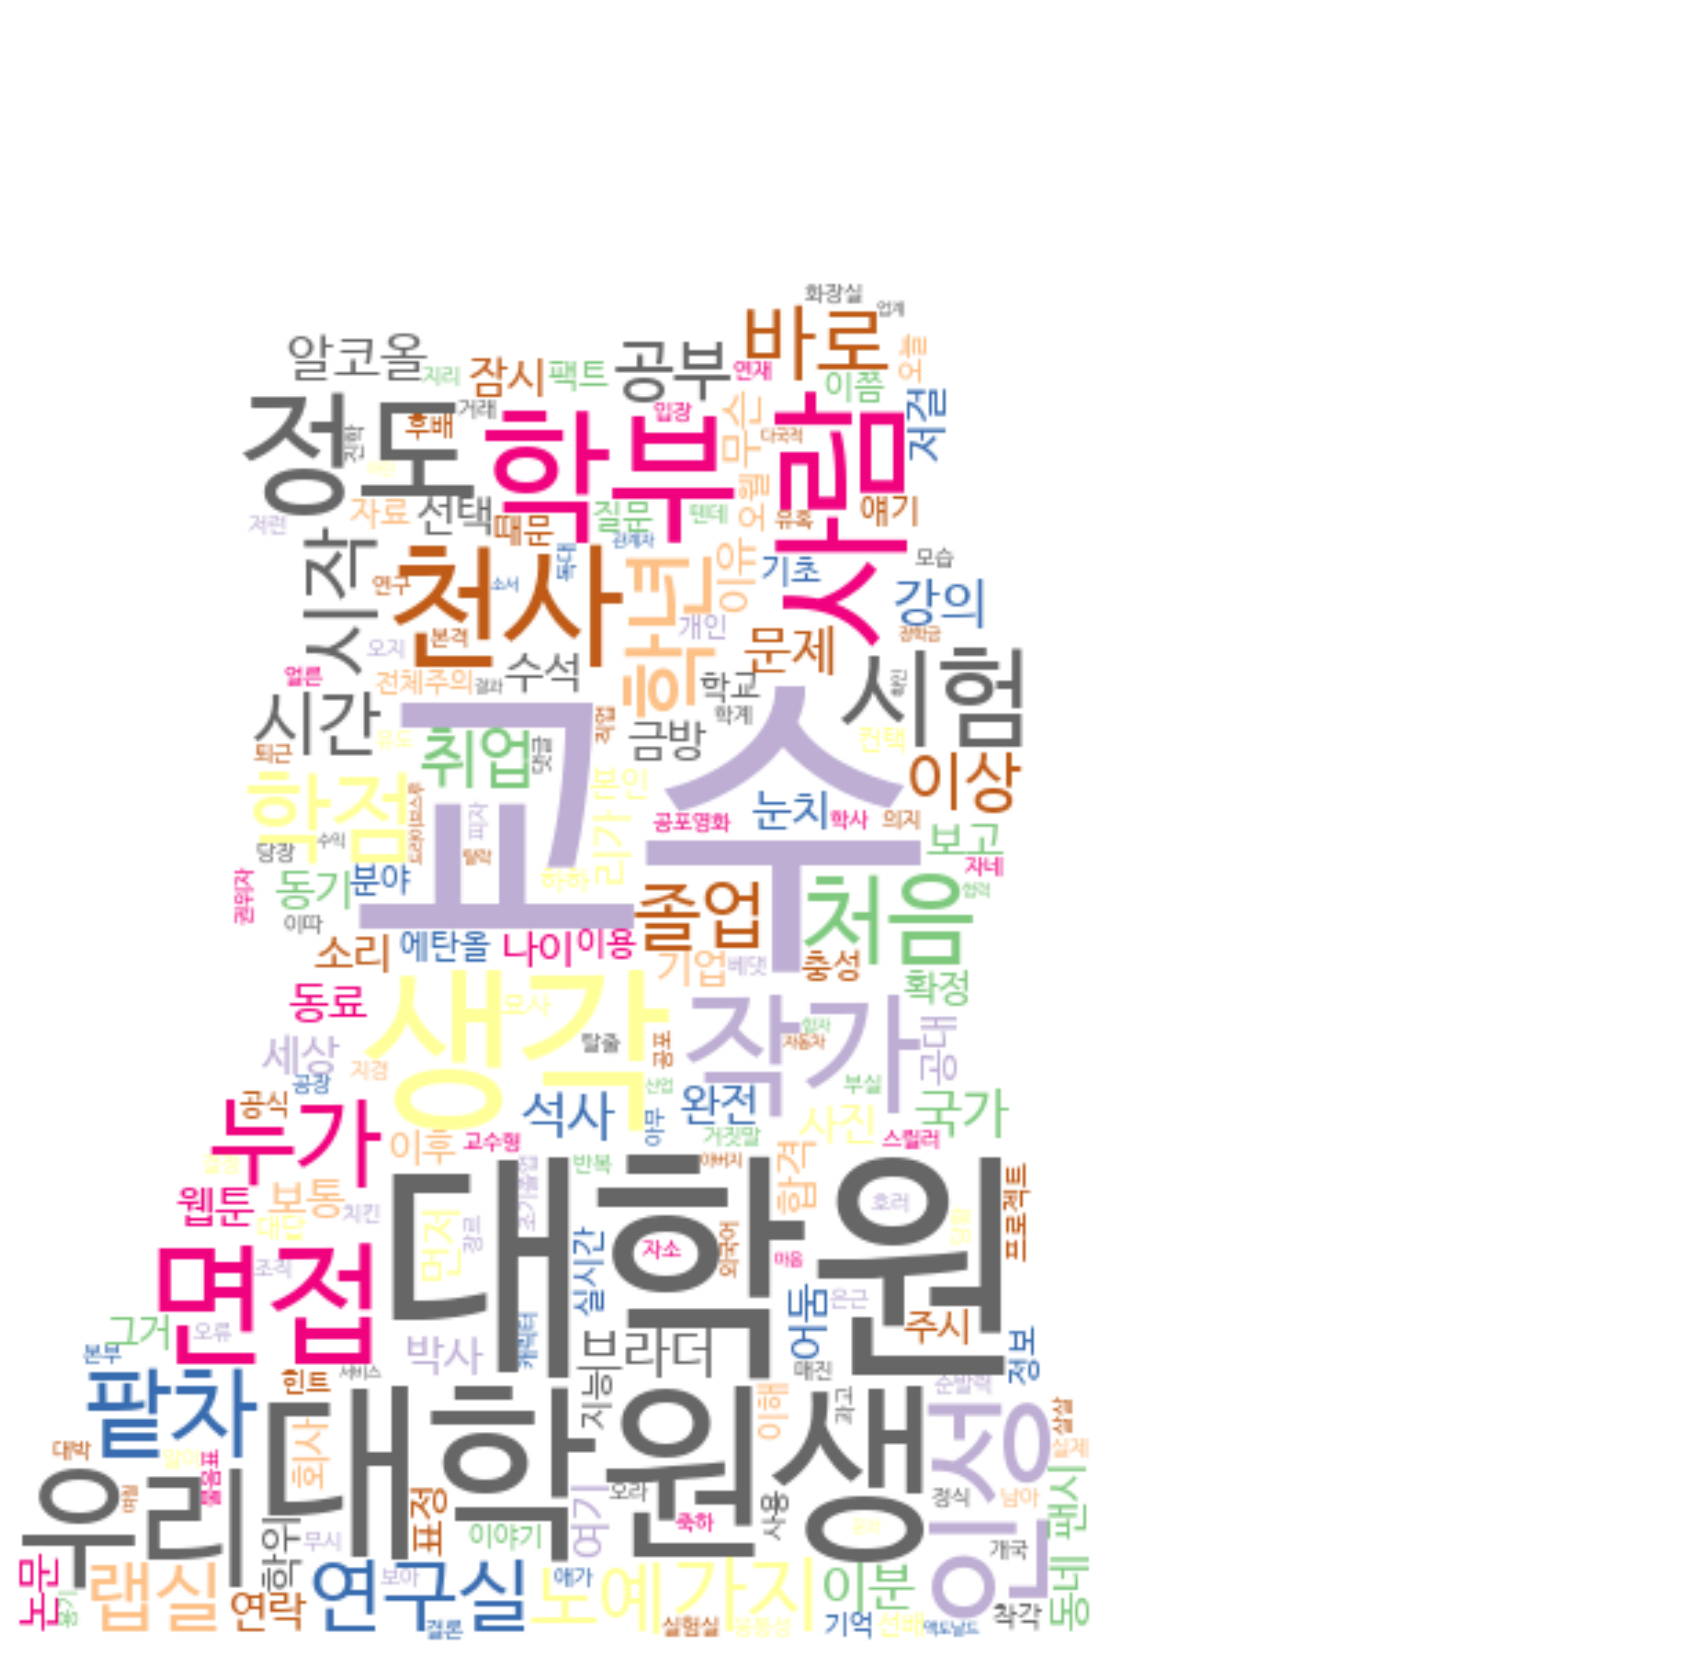

In [56]:
# 쿼카

img_mask = np.array(Image.open("쿼카.jpg")) 

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      colormap = "Accent_r", 
                      mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig("result_weebtoon.png")
plt.show()

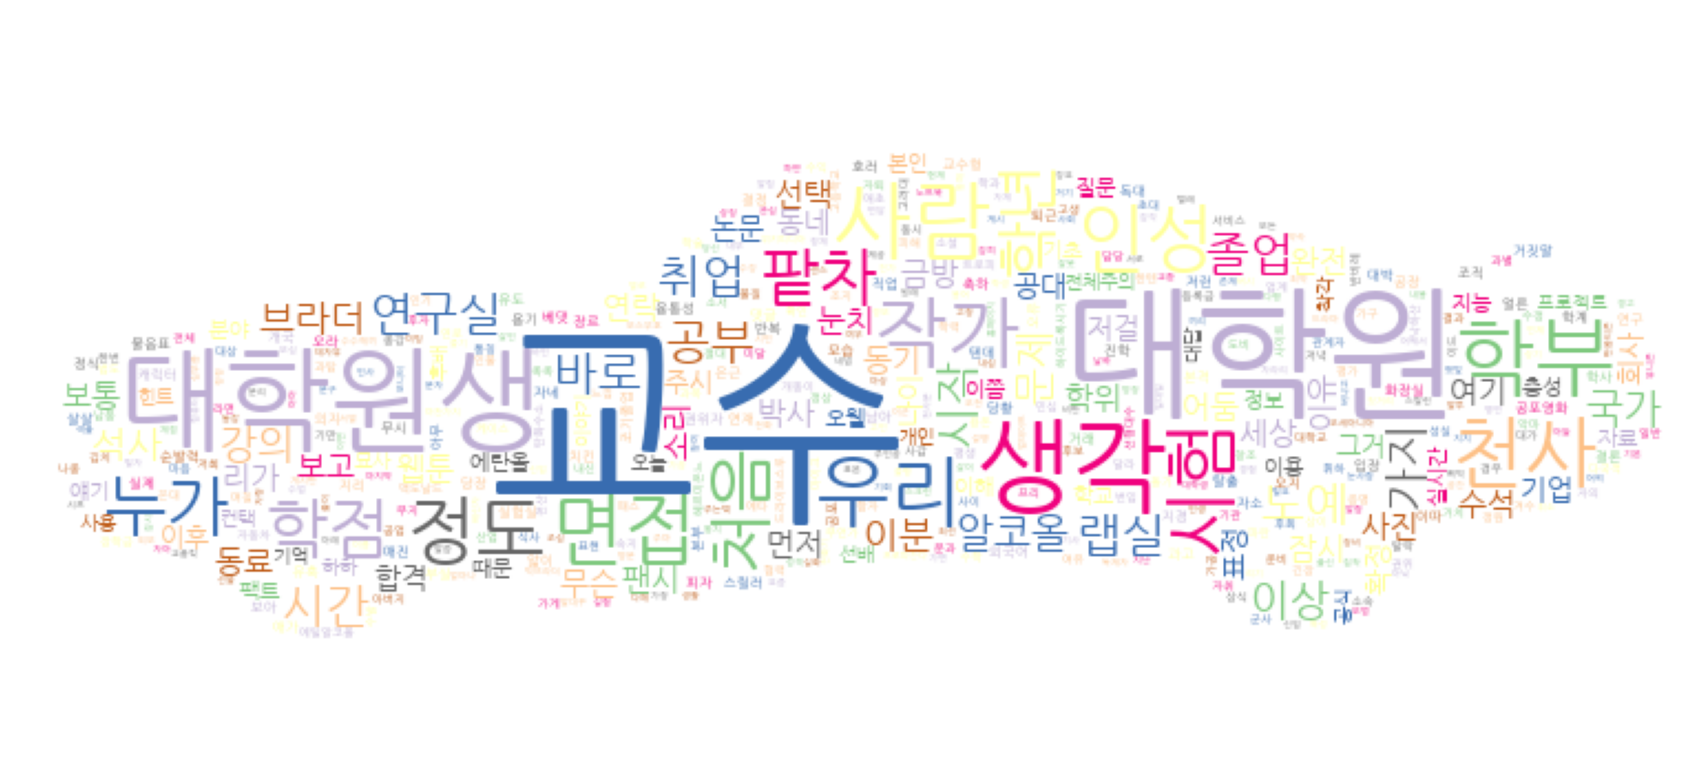

In [40]:
#차
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("car.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "NanumGothic.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', colormap = "Accent_r", stopwords=stopwords, random_state=10,mask=img_mask, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt)

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "hamming")
plt.axis("off")
plt.show()